<a href="https://colab.research.google.com/github/lulubeyz/ML_Project/blob/main/PROJE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [23]:
datas=pd.read_csv("/content/Hitters.csv")
datas=datas.dropna()
dms=pd.get_dummies(datas[["League","NewLeague","Division"]])
y=datas["Salary"]
x_=datas.drop(["Salary","League","NewLeague","Division"],axis=1).astype("float64")
x=pd.concat([x_,dms],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
SVR_model=SVR(kernel="rbf")

In [27]:
params={
    "C":[0.1,1,10,100,1000],
    "gamma":['scale','auto',0.01,0.1,1],
    "degree":[2,3,4,5,6],
}

In [28]:
SVR_cv = GridSearchCV(SVR_model, params, cv=3, n_jobs=-1, verbose=2)

In [29]:
SVR_cv.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1]},
             verbose=2)

In [33]:
C=SVR_cv.best_params_['C']
gamma=SVR_cv.best_params_["gamma"]
degree=SVR_cv.best_params_["degree"]



In [34]:
SVR_tuned = SVR(
    C=SVR_cv.best_params_['C'],
    gamma=SVR_cv.best_params_['gamma'],
    degree=SVR_cv.best_params_['degree'],
)


In [36]:
SVR_tuned.fit(X_train, y_train)

SVR(C=1000, degree=2)


 Metrik

MSE: 139434.2199403701
RMSE: 373.40891786400886
MAE: 186.1949579106079

------------------------------------------

Bağımsız değişkenlerin önem sıralaması

SVR modelinin özelliği olmadığı için 'feature_importances_' veya 'coef_' kullanılamaz.

Division - Salary Grafiği



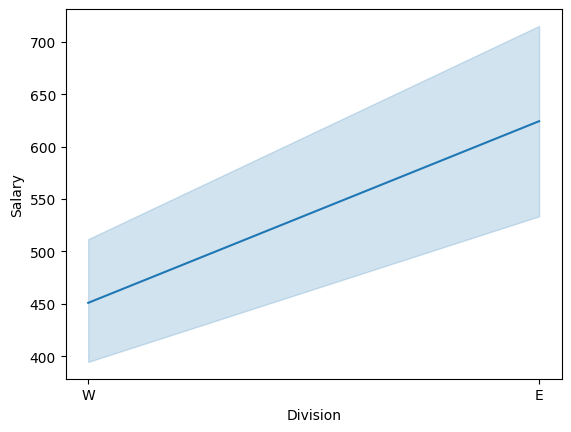



Histogram grafiği



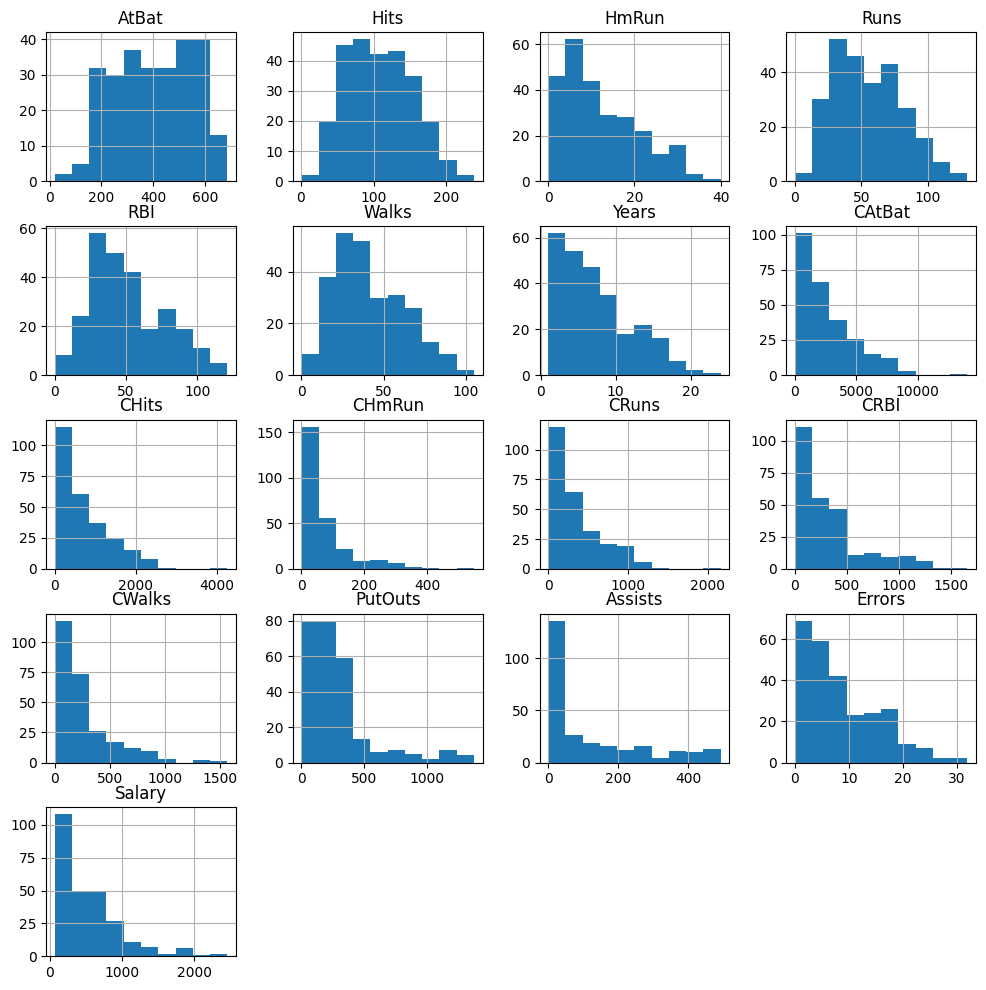

In [37]:
predict=SVR_tuned.predict(X_test)
MSE=mean_squared_error(y_test,predict)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_test,predict)
print("\n Metrik\n")
print("MSE:",MSE)
print("RMSE:",RMSE)
print("MAE:",MAE)

print("\n------------------------------------------\n")
print("Bağımsız değişkenlerin önem sıralaması\n")
try:
    # Eğer kernel='linear' kullanıyorsan, coef_ mevcut olabilir.
    importance = pd.DataFrame({"Importance": SVR_tuned.coef_[0] * 100}, index=X_train.columns)
    importance = importance.sort_values(by="Importance", ascending=True)
    importance.plot(kind="barh", color="r")
    plt.xlabel("Variable Importance")
    plt.gca().legend_ = None
    plt.show()
except AttributeError:
    print("SVR modelinin özelliği olmadığı için 'feature_importances_' veya 'coef_' kullanılamaz.")

# -----------------------------------
print("\nDivision - Salary Grafiği\n")
sns.lineplot(data=datas, x="Division", y="Salary")
plt.show()

# -----------------------------------
print("\n\nHistogram grafiği\n")
datas.hist(figsize=(12,12))
plt.show()